# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/data.csv') 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.shape

(614, 13)

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)

In [5]:
# df.Credit_History.value_counts()
print(f'{df.Credit_History.value_counts()[1]} applicants have a Credit History')
print(f'{df.Credit_History.value_counts()[0]} applicants do not have a Credit History')
print(f'{df.Credit_History.isnull().sum()} applicants have a missing Credit History')

475 applicants have a Credit History
89 applicants do not have a Credit History
50 applicants have a missing Credit History


2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.

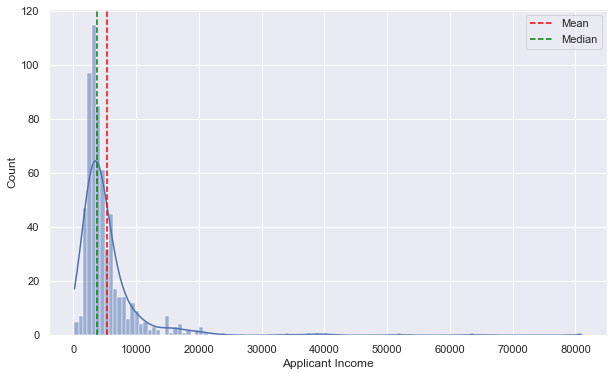

In [6]:
sns.set_theme(style="darkgrid") 
fig = plt.subplots(figsize = (10,6))

sns.histplot(df.ApplicantIncome, kde=True).set(xlabel='Applicant Income')
plt.axvline(df.ApplicantIncome.mean(), color = 'red', linestyle='--', label = 'Mean')
plt.axvline(df.ApplicantIncome.median(), color = 'green', linestyle='--', label = 'Median')

# place legend outside
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
 
# rendering plot
plt.show()

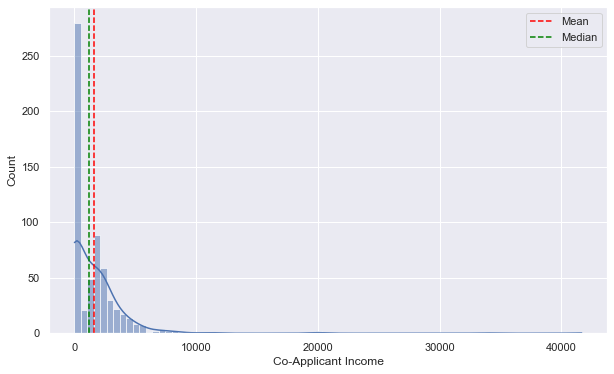

In [7]:
sns.set_theme(style="darkgrid") 
fig = plt.subplots(figsize = (10,6))

sns.histplot(df.CoapplicantIncome, kde=True).set(xlabel='Co-Applicant Income')
plt.axvline(df.CoapplicantIncome.mean(), color = 'red', linestyle='--', label = 'Mean')
plt.axvline(df.CoapplicantIncome.median(), color = 'green', linestyle='--', label = 'Median')

# place legend outside
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
 
# rendering plot
plt.show()

Distributions are skewed. Some Applicants have a higher income than others Applicants. Co-Applicants have less money compared with Applicants.
The Median is less than the mean, which means that more than 50% of the Applicants and Co-Applicants have less than the average income.

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [8]:
# display(df.dtypes)
display(df.dtypes[df.dtypes=='object'].index.tolist())

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [9]:
display(df.Gender.unique())
display(df.Gender.value_counts())

array(['Male', 'Female', nan], dtype=object)

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
display(df.Married.unique())
display(df.Married.value_counts())

array(['No', 'Yes', nan], dtype=object)

Yes    398
No     213
Name: Married, dtype: int64

array(['0', '1', '2', '3+', nan], dtype=object)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Dependents,0,1,2,3+
Loan_Status,,,,
N,107,36,25,18
Y,238,66,76,33


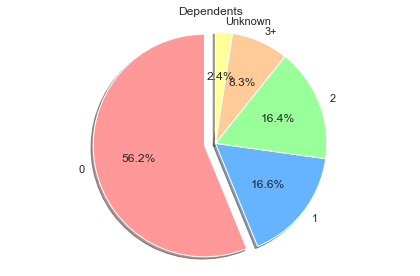

In [11]:
display(df.Dependents.unique())
display(df.Dependents.value_counts())

fig1, ax1 = plt.subplots()

ax1.pie([345, 102, 101, 51, 15], labels=['0','1','2','3+','Unknown'], colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#feff99'], explode = (0.1,0,0,0,0), autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Dependents')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()

# Correlation for number of dependents
pd.crosstab(df['Loan_Status'], df['Dependents'])

array(['Graduate', 'Not Graduate'], dtype=object)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

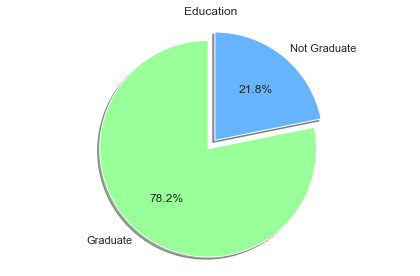

Education,Graduate,Not Graduate
Loan_Status,,
N,140,52
Y,340,82


In [12]:
display(df.Education.unique())
display(df.Education.value_counts())

fig1, ax2 = plt.subplots()

ax2.pie([480,134], labels=['Graduate','Not Graduate'], colors = ['#99ff99','#66b3ff'], explode = (0, 0.1), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Education')

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')
plt.tight_layout()
plt.show()

# Correlation for number of education
pd.crosstab(df['Loan_Status'], df['Education'])

In [13]:
display(df.Self_Employed.unique())
display(df.Self_Employed.value_counts())

# Correlation for number of self-employed people
pd.crosstab(df['Loan_Status'], df['Self_Employed'])

array(['No', 'Yes', nan], dtype=object)

No     500
Yes     82
Name: Self_Employed, dtype: int64

Self_Employed,No,Yes
Loan_Status,,
N,157,26
Y,343,56


array(['Urban', 'Rural', 'Semiurban'], dtype=object)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

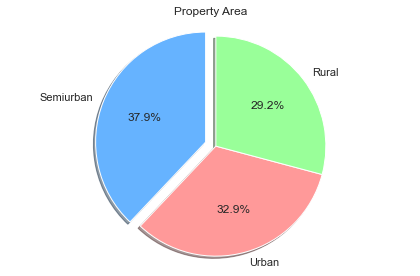

In [14]:
display(df.Property_Area.unique())
display(df.Property_Area.value_counts())

fig1, ax3 = plt.subplots()

ax3.pie([233,202,179], labels=['Semiurban','Urban','Rural'], colors = ['#66b3ff','#ff9999','#99ff99'], explode = (0.1,0,0), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Property Area')

# Equal aspect ratio ensures that pie is drawn as a circle
ax3.axis('equal')
plt.tight_layout()
plt.show()

In [15]:
display(df.Loan_Status.unique())
display(df.Loan_Status.value_counts())

array(['Y', 'N'], dtype=object)

Y    422
N    192
Name: Loan_Status, dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [16]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
cat_feat = list(df.dtypes[df.dtypes=='object'].index)
cat_feat.remove('Loan_ID')

for i in cat_feat:
    print (df[i].unique())

print('\n')    

for j in cat_feat:
    print (df[j].value_counts())    

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


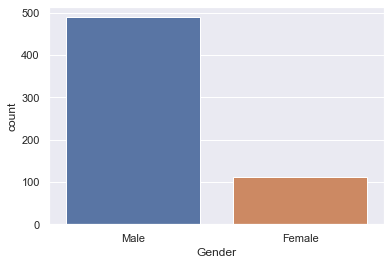

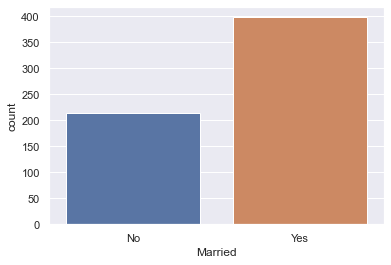

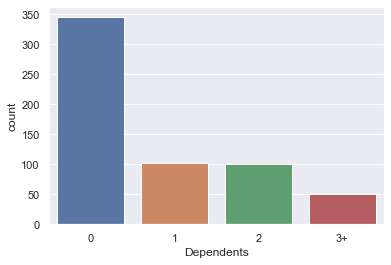

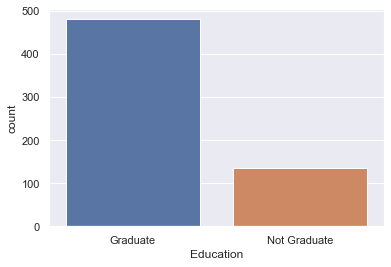

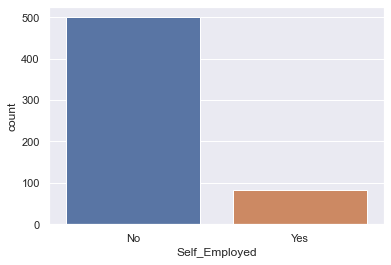

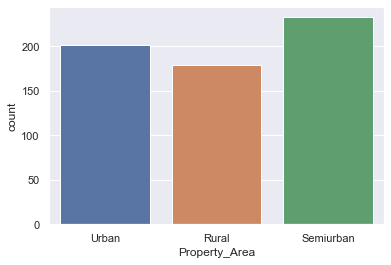

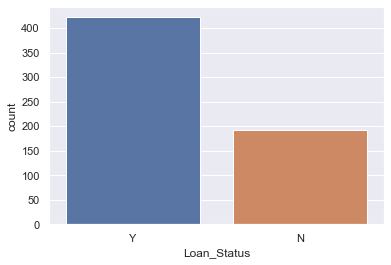

In [18]:
for a in cat_feat:
    sns.countplot(x=df[a])
    plt.show()

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



[Text(0.5, 0, 'Applicant Income')]

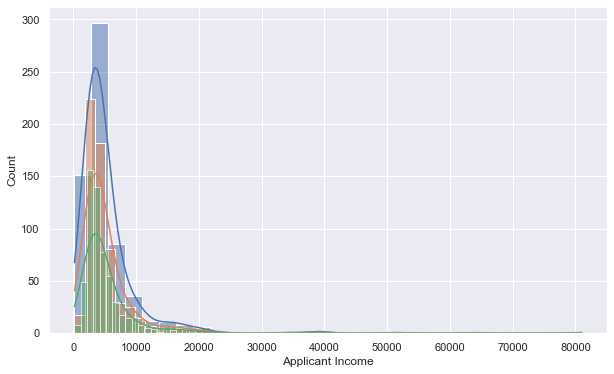

In [19]:
# Applicant Income Histogram
fig = plt.subplots(figsize = (10,6))

sns.histplot(df.ApplicantIncome, kde=True, bins = 30).set(xlabel='Applicant Income')
sns.histplot(df.ApplicantIncome, kde=True, bins = 50).set(xlabel='Applicant Income')
sns.histplot(df.ApplicantIncome, kde=True, bins = 80).set(xlabel='Applicant Income')


The distribution is seen more clearly when there are 50 or more bins.

[Text(0, 0.5, 'Applicant Income')]

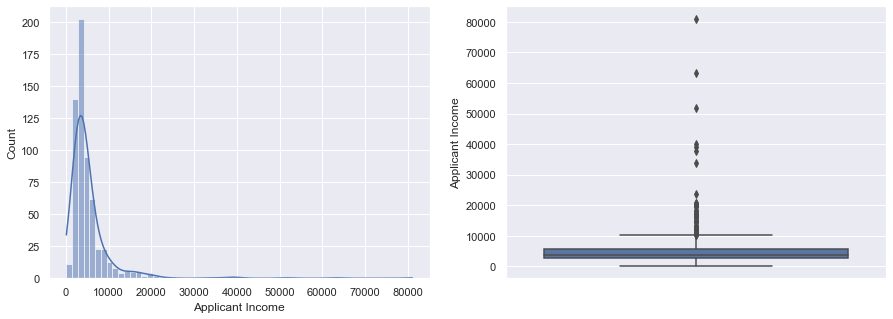

In [20]:
# Applicant Income Histogram and Boxplot
bins = 60
sns.set_theme(style="darkgrid") 

fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.histplot(df.ApplicantIncome, kde=True, bins = bins, ax=ax[0]).set(xlabel='Applicant Income')
sns.boxplot(y = df.ApplicantIncome,  ax=ax[1]).set(ylabel='Applicant Income')

[Text(0, 0.5, 'Co-Applicant Income')]

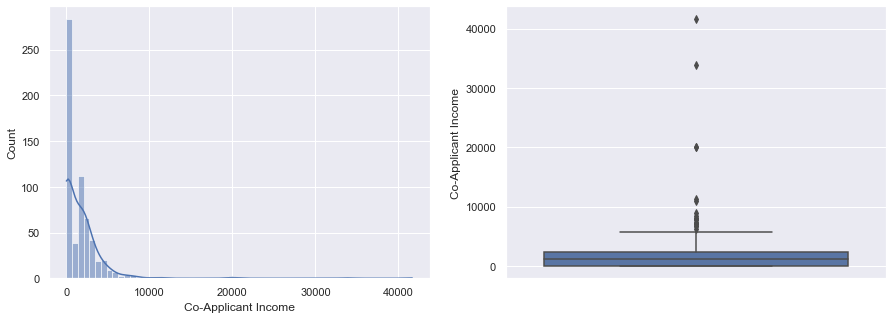

In [21]:
# Co-Applicant Income Histogram and Boxplot
bins = 60
sns.set_theme(style="darkgrid") 

fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.histplot(df.CoapplicantIncome, kde=True, bins = bins, ax=ax[0]).set(xlabel='Co-Applicant Income')
sns.boxplot(y = df.CoapplicantIncome,  ax=ax[1]).set(ylabel='Co-Applicant Income')


[Text(0, 0.5, 'Loan Amount')]

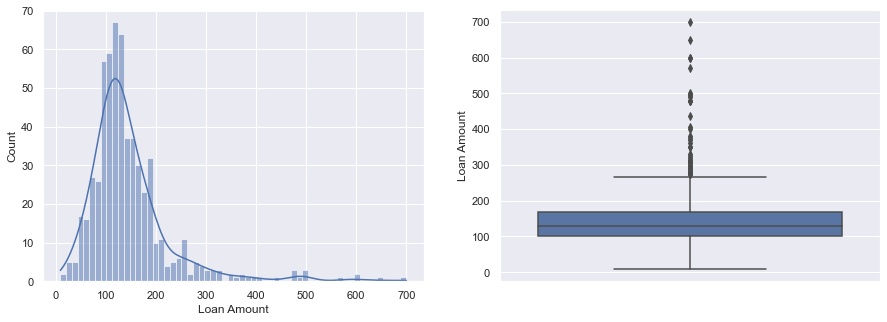

In [22]:
# Loan Amount Histogram and Boxplot
bins = 60
sns.set_theme(style="darkgrid") 

fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.histplot(df.LoanAmount, kde=True, bins = bins, ax=ax[0]).set(xlabel='Loan Amount')
sns.boxplot(y = df.LoanAmount,  ax=ax[1]).set(ylabel='Loan Amount')


Look at box plots to understand the distributions. 

Text(0.5, 0, 'Loan Status')

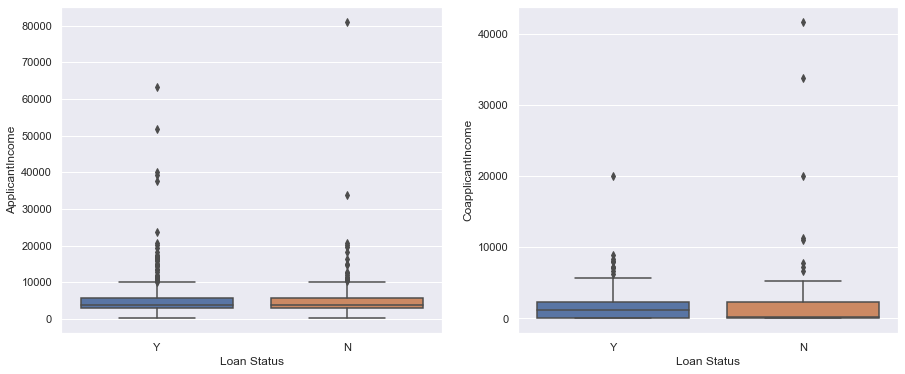

In [23]:
# Income by Loan Status
sns.set_theme(style="darkgrid") 

fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.boxplot(x = df.Loan_Status, y = df.ApplicantIncome, ax=ax[0]).set_xlabel('Loan Status')
sns.boxplot(x = df.Loan_Status, y = df.CoapplicantIncome, ax=ax[1]).set_xlabel('Loan Status')

Text(0.5, 0, 'Gender')

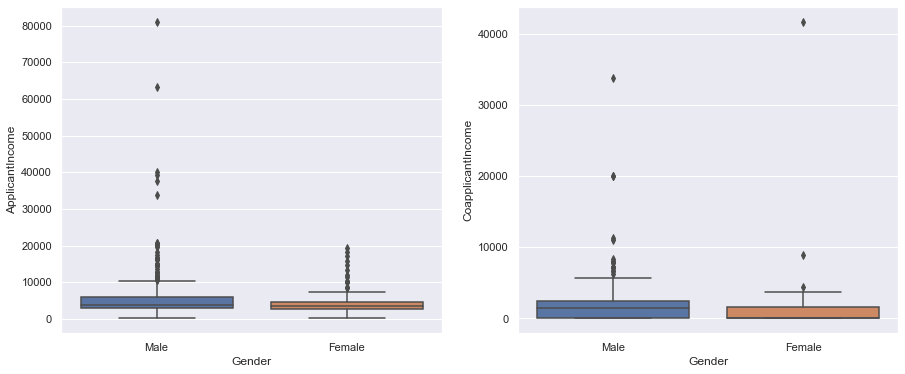

In [24]:
# Income by Gender
sns.set_theme(style="darkgrid") 

fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.boxplot(x = df.Gender, y = df.ApplicantIncome, ax=ax[0]).set_xlabel('Gender')
sns.boxplot(x = df.Gender, y = df.CoapplicantIncome, ax=ax[1]).set_xlabel('Gender')

Text(0.5, 0, 'Education')

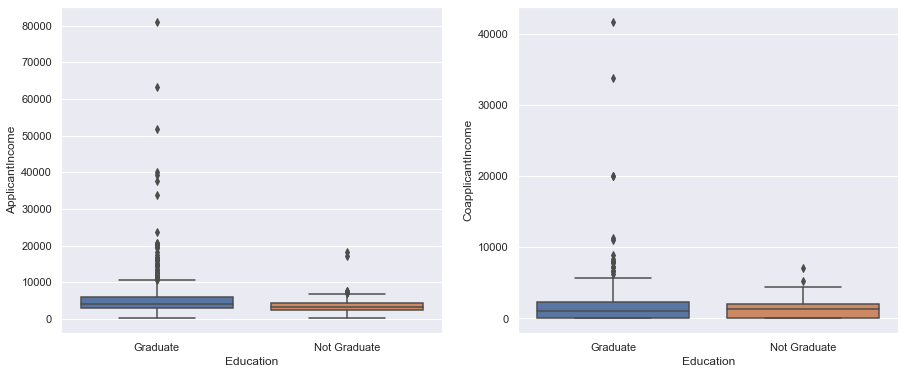

In [25]:
# Income by Education
sns.set_theme(style="darkgrid") 

fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.boxplot(x = df.Education, y = df.ApplicantIncome, ax=ax[0]).set_xlabel('Education')
sns.boxplot(x = df.Education, y = df.CoapplicantIncome, ax=ax[1]).set_xlabel('Education')

Look at the distribution of income segregated  by `Education`

[Text(0.5, 0, 'Co-Applicant Income')]

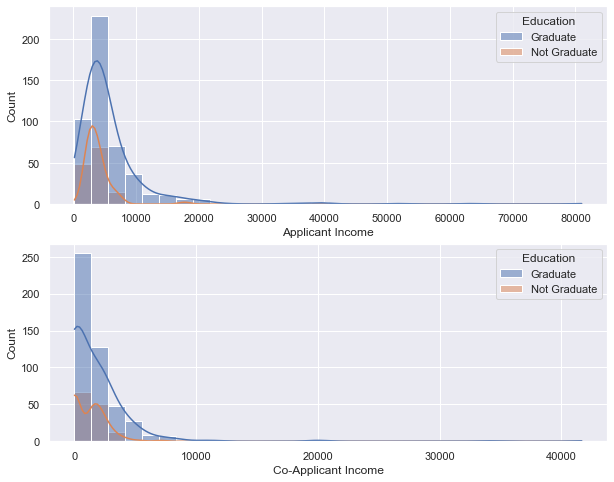

In [26]:
sns.set_theme(style="darkgrid") 

fig, ax = plt.subplots(2,1, figsize = (10,8))
sns.histplot(data = df, x = 'ApplicantIncome', hue = 'Education', kde=True, bins = 30, ax=ax[0]).set(xlabel='Applicant Income')
sns.histplot(data = df, x = 'CoapplicantIncome', hue = 'Education', kde=True, bins = 30, ax=ax[1]).set(xlabel='Co-Applicant Income')


Look at the histogram and boxplot of LoanAmount

[Text(0.5, 0, 'Loan Amount')]

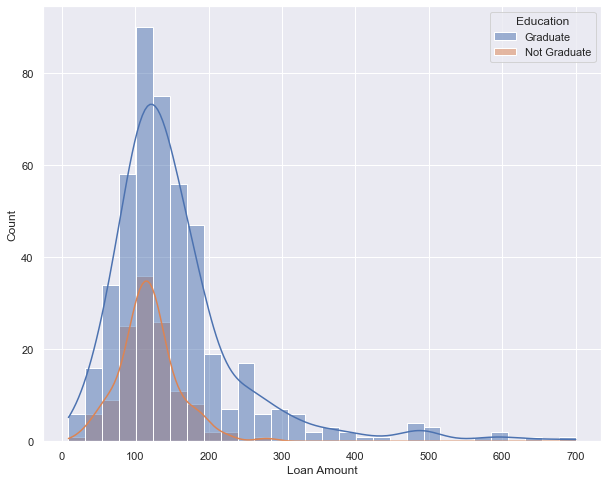

In [27]:
sns.set_theme(style="darkgrid") 

fig= plt.subplots(figsize = (10,8))
sns.histplot(data = df, x = 'LoanAmount', hue = 'Education', kde=True, bins = 30).set(xlabel='Loan Amount')


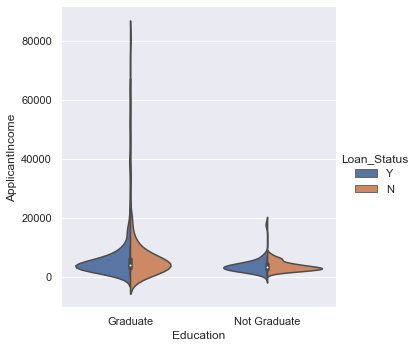

In [28]:
sns.catplot(data=df, kind="violin", x="Education", y="ApplicantIncome", hue="Loan_Status", split=True)

Text(0.5, 0, 'Applicant Income')

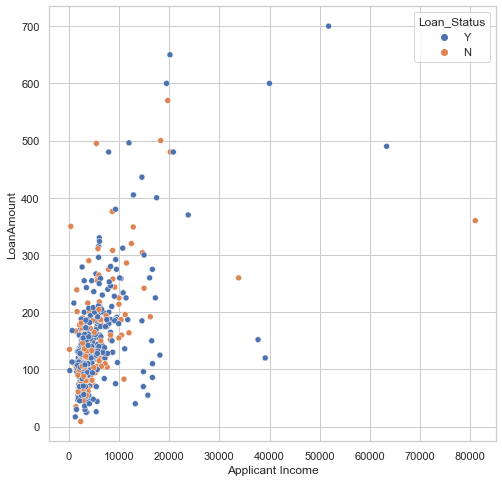

In [29]:
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(8, 8))
sns.scatterplot(x= df.ApplicantIncome, y= df.LoanAmount, hue= df.Loan_Status).set_xlabel('Applicant Income')

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [30]:
# Gender
pd.pivot_table(df, 
                values = ['ApplicantIncome','LoanAmount'], 
                index = ['Gender', 'Loan_Status'], 
                aggfunc=np.mean 
            )

ApplicantIncome  LoanAmount
Gender Loan_Status                             
Female N                4091.351351  128.694444
       Y                4915.853333  125.712329
Male   N                5859.240000  157.878571
       Y                5263.814159  145.612121

Will use this information to filling LoanAmount missing value in Part 3


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [31]:
# Self_employed
pd.pivot_table(df, 
                values = ['ApplicantIncome','LoanAmount'], 
                index = ['Self_Employed', 'Loan_Status'], 
                aggfunc=np.mean 
            )

ApplicantIncome  LoanAmount
Self_Employed Loan_Status                             
No            N                5397.592357  149.479730
              Y                4890.530612  138.323353
Yes           N                6081.076923  156.360000
              Y                7984.267857  179.240741

In [32]:
# Married
pd.pivot_table(df, 
                values = ['ApplicantIncome','LoanAmount'], 
                index = ['Married', 'Loan_Status'], 
                aggfunc=np.mean 
            )

ApplicantIncome  LoanAmount
Married Loan_Status                             
No      N                5034.493671  134.906667
        Y                4932.589552  125.435115
Yes     N                5733.823009  162.764151
        Y                5587.680702  153.075540

In [33]:
# Education
pd.pivot_table(df, 
                values = ['ApplicantIncome','LoanAmount'], 
                index = ['Education', 'Loan_Status'], 
                aggfunc=np.mean 
            )

ApplicantIncome  LoanAmount
Education    Loan_Status                             
Graduate     N                6114.514286  161.388060
             Y                5751.576471  151.093656
Not Graduate N                3646.442308  122.234043
             Y                3860.256098  116.162500

Graduated people with a higher income must be approved for a loan; however, graduated people with a higher income were not approved. But graduates with lower income were approved.

In [34]:
# Property
pd.pivot_table(df, 
                values = ['ApplicantIncome','LoanAmount'], 
                index = ['Property_Area', 'Loan_Status'], 
                aggfunc=np.mean 
            )

ApplicantIncome  LoanAmount
Property_Area Loan_Status                             
Rural         N                6497.521739  158.742424
              Y                4962.290909  148.261682
Semiurban     N                5296.851852  154.566038
              Y                5290.877095  142.760000
Urban         N                4511.420290  140.354839
              Y                5858.330827  143.085271

In [35]:
# Dependents
pd.pivot_table(df, 
                values = ['ApplicantIncome','LoanAmount'], 
                index = ['Dependents', 'Loan_Status'], 
                aggfunc=np.mean 
            )

ApplicantIncome  LoanAmount
Dependents Loan_Status                             
0          N                5071.112150  141.831683
           Y                4848.327731  133.309013
1          N                6211.305556  163.571429
           Y                5826.439394  155.873016
2          N                4073.360000  144.217391
           Y                5207.513158  152.066667
3+         N                8485.833333  199.687500
           Y                8633.242424  186.636364

In [36]:
# Dependents + Property
pd.pivot_table(df, 
                values = ['ApplicantIncome','LoanAmount'], 
                index = ['Property_Area', 'Dependents', 'Loan_Status'], 
                aggfunc=np.mean 
            )

ApplicantIncome  LoanAmount
Property_Area Dependents Loan_Status                             
Rural         0          N                5993.317073  163.375000
                         Y                4012.691176  130.283582
              1          N                4610.250000  140.181818
                         Y                4982.555556  144.375000
              2          N                4068.800000  132.333333
                         Y                6423.263158  194.444444
              3+         N               20613.800000  211.400000
                         Y                7725.923077  176.923077
Semiurban     0          N                4688.740741  140.038462
                         Y                4898.165049  132.362745
              1          N                8273.454545  171.545455
                         Y                6576.000000  165.444444
              2          N                4520.666667  138.166667
                         Y                4276.580645  141.064516
              3+         N                4405.125000  203.000000
                         Y                8007.916667  192.416667
Urban         0          N                4366.333333  118.542857
                         Y                5619.820896  137.984375
              1          N                5944.307692  176.615385
                         Y                5321.357143  149.928571
              2          N                3780.222222  162.125000
                         Y                5429.038462  135.846154
              3+         N                2887.000000  171.333333
                         Y               11045.625000  193.750000

In [37]:
# Overall
pd.pivot_table(df, 
                values = ['ApplicantIncome','LoanAmount'], 
                index = ['Property_Area', 'Gender', 'Education','Loan_Status'], 
                aggfunc=np.mean 
            )


ApplicantIncome  LoanAmount
Property_Area Gender Education    Loan_Status                             
Rural         Female Graduate     N                5362.875000  131.500000
                                  Y                3576.700000  121.900000
                     Not Graduate N                4003.000000   88.000000
                                  Y                4451.250000  120.500000
              Male   Graduate     N                8262.789474  185.714286
                                  Y                5384.805556  158.253521
                     Not Graduate N                4084.000000  130.421053
                                  Y                3640.772727  119.450000
Semiurban     Female Graduate     N                4247.363636  122.818182
                                  Y                5129.941176  146.156250
                     Not Graduate N                3008.000000  120.000000
                                  Y                4518.125000  112.500000
              Male   Graduate     N                6456.966667  176.758621
                                  Y                5775.556604  150.894231
                     Not Graduate N                3736.000000  134.111111
                                  Y                3385.666667  113.222222
Urban         Female Graduate     N                3598.666667  144.500000
                                  Y                4969.529412   97.294118
                     Not Graduate N                2275.000000   80.000000
                                  Y               10036.000000  122.500000
              Male   Graduate     N                5500.351351  152.571429
                                  Y                5827.946237  151.202247
                     Not Graduate N                3321.058824  111.692308
                                  Y                3737.315789  116.842105

Text(0.5, 0, 'Loan Status by Gender')

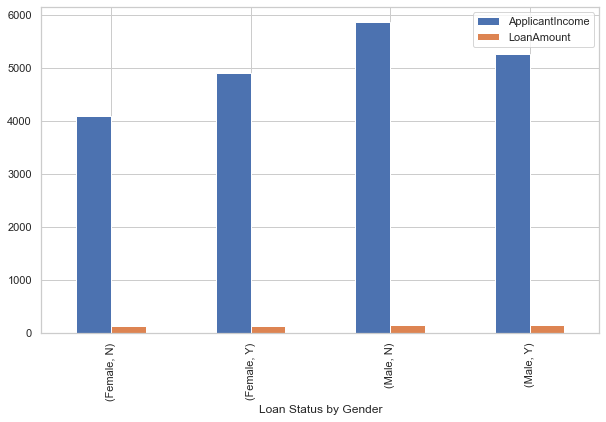

In [38]:
# Loan Status by Gender pivot_table visualization
plt.rcParams["figure.figsize"] = [10, 6]

gender = pd.pivot_table(df, 
                values = ['ApplicantIncome','LoanAmount'], 
                index = ['Gender', 'Loan_Status'], 
                aggfunc=np.mean 
            )
            
gender.plot(kind='bar').set_xlabel('Loan Status by Gender')

Text(0.5, 0, 'Loan Status by Education')

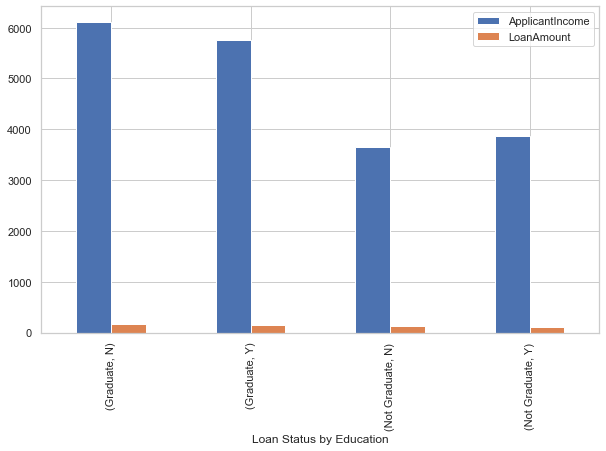

In [39]:
# Loan Status by Education pivot_table visualization
plt.rcParams["figure.figsize"] = [10, 6]

education = pd.pivot_table(df, 
                values = ['ApplicantIncome','LoanAmount'], 
                index = ['Education', 'Loan_Status'], 
                aggfunc=np.mean 
            )
            
education.plot(kind='bar').set_xlabel('Loan Status by Education')


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



In [40]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [41]:
# Gender
df['Gender'] = df['Gender'].fillna('Other')
# Married
df['Married'] = df['Married'].fillna('No')
# Dependents
df['Dependents'] = df['Dependents'].fillna(0)
# Self_Employed
df['Self_Employed'] = df['Self_Employed'].fillna('No')
# LoanAmount
df['LoanAmount'] = df[['Gender','LoanAmount']].groupby('Gender').transform(lambda x: x.fillna(x.mean()))
# Loan_Amount_Term
display(df['Loan_Amount_Term'].describe())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360.0)
# Credit_History
df['Credit_History'] = df['Credit_History'].fillna(1.0)

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [42]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

[Text(0.5, 1.0, 'Loan Amount Distribution'), Text(0.5, 0, 'Loan Amount')]

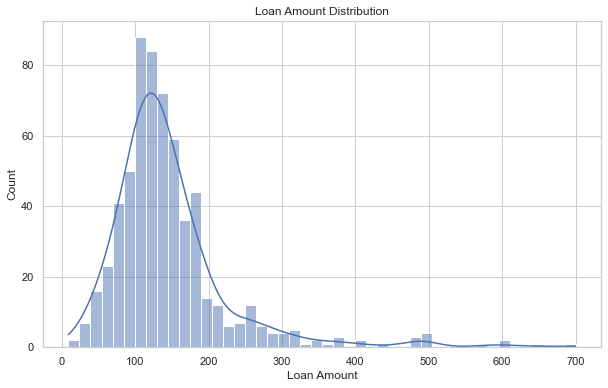

In [43]:
sns.histplot(df.LoanAmount, kde=True).set(title='Loan Amount Distribution', xlabel='Loan Amount')

[Text(0.5, 1.0, 'Loan Amount Log Distribution'),
 Text(0.5, 0, 'Loan Amount Log')]

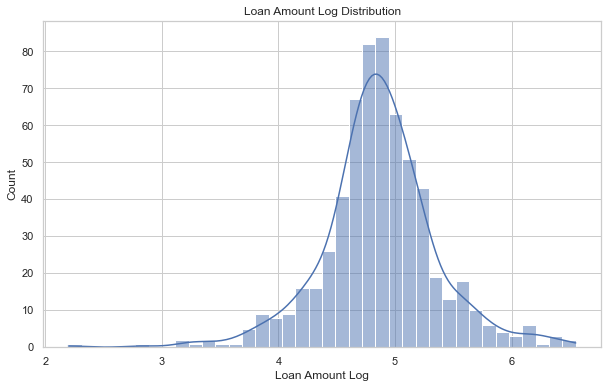

In [44]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])

sns.histplot(df.LoanAmountLog, kde=True).set(title='Loan Amount Log Distribution', xlabel='Loan Amount Log')

Combine both incomes as total income and take a log transformation of the same.

In [45]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

[Text(0.5, 1.0, 'Total Income Distribution'), Text(0.5, 0, 'Total Income')]

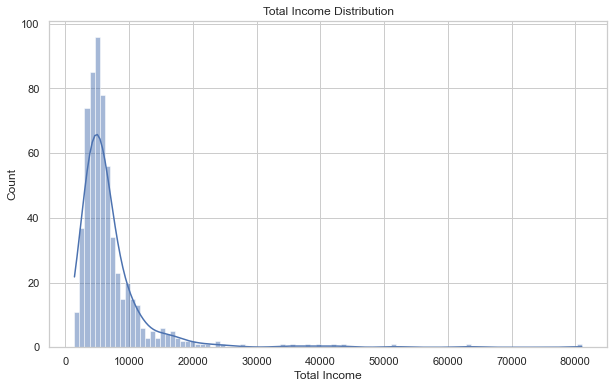

In [46]:
sns.histplot(df.TotalIncome, kde=True).set(title='Total Income Distribution', xlabel='Total Income')


[Text(0.5, 1.0, 'Total Income Log Distribution'),
 Text(0.5, 0, 'Total Income Log')]

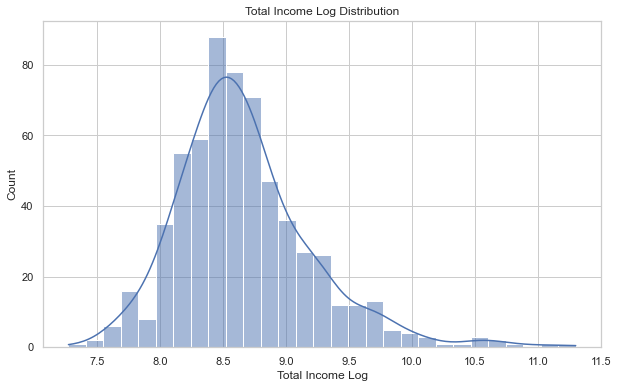

In [47]:
df['TotalIncomeLog'] = np.log(df['TotalIncome'])

sns.histplot(df.TotalIncomeLog, kde=True).set(title='Total Income Log Distribution', xlabel='Total Income Log')

In [48]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmountLog', 'TotalIncome', 'TotalIncomeLog'],
      dtype='object')

In [49]:
cat_feat = list(df.dtypes[df.dtypes=='object'].index)
cat_feat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [50]:
#separting Categorical and numerical
cat_feats = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']]
num_feats = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmountLog', 'Loan_Amount_Term', 'TotalIncomeLog']]

## 'LoanAmount', 'TotalIncome'

## 4. Building a Predictive Model

In [51]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix, roc_auc_score


In [634]:
# # cat to num

# df['Gender'] = df['Gender'].replace({'Male':0,'Female':1,'Other':2})
# df['Married'] = df['Married'].replace({'No':0,'Yes':1})
# df['Dependents'] = df['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3})
# df['Education'] = df['Education'].replace({'Not Graduate':0,'Graduate':1})
# df['Self_Employed'] = df['Self_Employed'].replace({'No':0,'Yes':1})
# df['Property_Area'] = df['Property_Area'].replace({'Urban':0,'Semiurban':1,'Rural':2})
# df['Loan_Status'] = df['Loan_Status'].replace({'N':0,'Y':1})

In [821]:
# # Scale the data 
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [1]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix, roc_auc_score

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/data.csv') 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Split X and y
X = df.drop(['Loan_Status', 'Loan_ID'], axis = 1)
y = df['Loan_Status']
# y = y.replace({"Y":1,"N":0})

# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
def preprocess(df):
    # Loan amounts and Total income to Log
    df['LoanAmountLog'] = np.log(df['LoanAmount'].astype('float64'))
    # df['TotalIncomeLog'] = (np.log(df['ApplicantIncome'] + df['CoapplicantIncome']).astype('float64'))

    df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    df['TotalIncomeLog'] = np.log(df['TotalIncome'].astype('float64'))

    # Drop the original features
    cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome']
    df = df.drop(columns=cols)
    
    return df

In [12]:
# Create lists with categorical and numerical features
cat_feats = X_train.dtypes[X_train.dtypes == 'object'].index.tolist()
num_feats = X_train.dtypes[~X_train.dtypes.index.isin(cat_feats)].index.tolist()

In [13]:
def catFeat(data):
    return data[cat_feats]

def numFeat(data):
    return data[num_feats]

In [14]:
cat_transform = Pipeline([
                            ('FunctionTransformer',FunctionTransformer()),
                            ('impute_mode', SimpleImputer(strategy='most_frequent')), 
                            ('one-hot-encode', OneHotEncoder(sparse=False))
                        ])

num_transform = Pipeline([
                            ('feat_transform', FunctionTransformer(preprocess)),
                            ('FunctionTransformer', FunctionTransformer()), 
                            ('impute_mean', SimpleImputer(strategy='mean')),                               
                            ('scaler', StandardScaler())
                        ])

preprocessing = ColumnTransformer([
                            ('categorical', cat_transform, cat_feats),
                            ('numeric', num_transform, num_feats)
                        ])  

pipeline = Pipeline([
                    ('preprocessor', preprocessing),
                    ('model', LogisticRegression())
                    ])                                              

In [15]:
# Train the model
pipeline.fit(X_train,y_train)
print(f'Model Score: {pipeline.score(X_test, y_test)}')

Model Score: 0.7837837837837838


In [16]:
pipe_pred = pipeline.predict(X_test)

In [17]:
print('Accuracy: ', round(accuracy_score(y_test, pipe_pred)*100,2),'%')
print('Precision: ', round(precision_score(y_test, pipe_pred, pos_label='Y')*100,2),'%')
print('Recall: ', round(recall_score(y_test, pipe_pred, pos_label='Y')*100,2),'%')
print('Confusion Matrix:')
print(confusion_matrix(y_test, pipe_pred))



Accuracy:  78.38 %
Precision:  75.64 %
Recall:  98.33 %
Confusion Matrix:
[[ 27  38]
 [  2 118]]


In [18]:
# save the module
import pickle
with open('../src/LogRegModel.pickle', 'wb') as fh:
    pickle.dump(pipeline, fh)

---
## Visualizing pipelines
Another advantage of having these pipelines is that we can quickly visualize complex workflows used in our
modeling as HTML, which can be helpful for debugging purposes or presentations.

<sub>*Note: I highly recommend you use this in your own presentations as a substitute for (or in addition to) code.*</sub>

In [19]:
# Display HTML representation in a jupyter context
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('FunctionTransformer',
                                                                   FunctionTransformer()),
                                                                  ('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('numeric',
                                                  Pipeline(steps=[('feat_transform',
                                                                   FunctionTransformer(func=<function preprocess at 0x154b39b80>)),
                                                                  ('FunctionTransformer',
                                                                   FunctionTransformer()),
                                                                  ('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History'])])),
                ('model', LogisticRegression())])

Note that you can also click on the individual parts in the diagram (e.g. PCA) to see their arguments.

Confusion Matrix:


/opt/homebrew/Caskroom/miniforge/base/envs/new_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


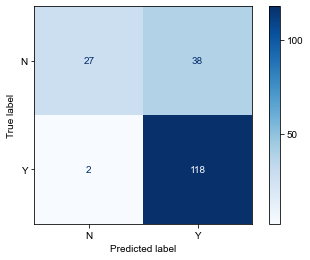

In [20]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix

fig, ax = plt.subplots()
print('Confusion Matrix:')
cm = plot_confusion_matrix(pipeline, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
sns.set(font_scale=3.0)

# 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [21]:
X_test.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban


In [26]:
json_data = {
 "Gender": "Male",
 "Married": "Yes",
 "Dependents": "0",
 "Education": "Graduate",
 "Self_Employed": "No",
 "ApplicantIncome": 9083,
 "CoapplicantIncome": 0.0,
 "LoanAmount": 228.0,
 "Loan_Amount_Term": 360.0,
 "Credit_History": 1.0,
 "Property_Area": "Semiurban"
}

In [27]:
import requests
# URL = 'http://ec2-35-91-232-133.us-west-2.compute.amazonaws.com:5555/scoring'

URL = 'http://127.0.0.1:5555/scoring'
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data) 

In [28]:
print(r.json())

The probability of loan refusal for this individual is 9.7%.
